Sometimes we train machine learning model and get good result but we have much features and we guess that some of them are not needed but we don't know exactly which columns are needless. In such cases we want to find out which features are more important than others. Feature Importance is a technique that assigns some scores to features and helps us to find out which features are more useful to predict a target variable.

There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


# Classification Data Creation

We'll use `make_classification` method from `sklearn.datasets` module to create a random dataset for classification tasks. The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. We will fix the random number seed to ensure we get the same examples each time the code is run.

In [2]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

print(X.shape, y.shape)

(1000, 10) (1000,)


# Regression Data Creation 

We'll use `make_regression` method from `sklearn.datasets` module to create a random dataset for regression tasks. The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. We will fix the random number seed to ensure we get the same examples each time the code is run.

In [3]:
from sklearn.datasets import make_regression

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

print(X.shape, y.shape)

(1000, 10) (1000,)


# Coefficients as Feature Importance

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

Let’s take a closer look at using coefficients as feature importance for classification and regression. We will fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and finally create a bar chart to get an idea of the relative importance of the features.

## Linear Regression Feature Importance

We can fit a LinearRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


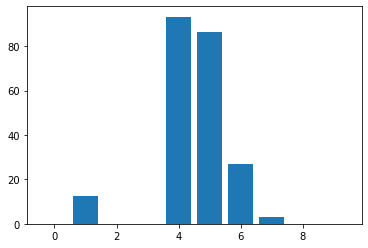

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = LinearRegression()

model.fit(X, y)

importance = model.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model.

## Logistic Regression Feature Importance

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


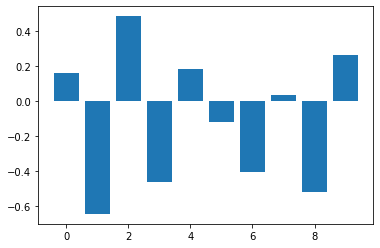

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = LogisticRegression()

model.fit(X, y)

importance = model.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

Now that we have seen the use of coefficients as importance scores, let’s look at the more common example of decision-tree-based importance scores.

## Decision Tree Feature Importance

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

### CART Feature Importance

We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

Let’s take a look at an example of this for regression and classification.

#### CART Regression Feature Importance

Feature: 0, Score: 0.00247
Feature: 1, Score: 0.00511
Feature: 2, Score: 0.00163
Feature: 3, Score: 0.00203
Feature: 4, Score: 0.51784
Feature: 5, Score: 0.43825
Feature: 6, Score: 0.02702
Feature: 7, Score: 0.00183
Feature: 8, Score: 0.00273
Feature: 9, Score: 0.00110


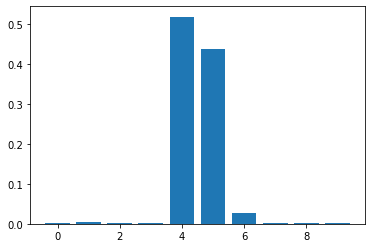

In [6]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = DecisionTreeRegressor()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps three of the 10 features as being important to prediction.

#### CART Classification Feature Importance

Feature: 0, Score: 0.01932
Feature: 1, Score: 0.01316
Feature: 2, Score: 0.17680
Feature: 3, Score: 0.30980
Feature: 4, Score: 0.08978
Feature: 5, Score: 0.01412
Feature: 6, Score: 0.18150
Feature: 7, Score: 0.02920
Feature: 8, Score: 0.12993
Feature: 9, Score: 0.03640


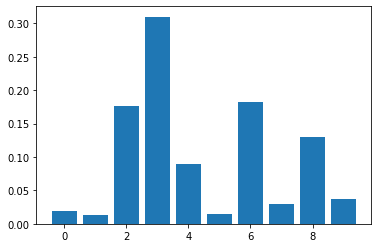

In [7]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = DecisionTreeClassifier()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps four of the 10 features as being important to prediction.

## Random Forest Feature Importance

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the RandomForestRegressor and RandomForestClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.

### Random Forest Regression Feature Importance

Feature: 0, Score: 0.00312
Feature: 1, Score: 0.00512
Feature: 2, Score: 0.00295
Feature: 3, Score: 0.00274
Feature: 4, Score: 0.52868
Feature: 5, Score: 0.42261
Feature: 6, Score: 0.02611
Feature: 7, Score: 0.00282
Feature: 8, Score: 0.00296
Feature: 9, Score: 0.00289


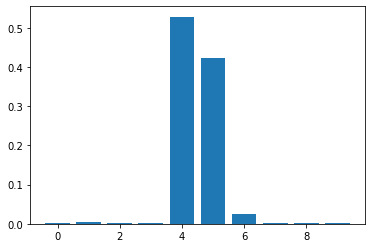

In [8]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = RandomForestRegressor()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### Random Forest Classification Feature Importance

Feature: 0, Score: 0.06220
Feature: 1, Score: 0.11213
Feature: 2, Score: 0.16175
Feature: 3, Score: 0.19306
Feature: 4, Score: 0.07455
Feature: 5, Score: 0.10629
Feature: 6, Score: 0.10800
Feature: 7, Score: 0.05001
Feature: 8, Score: 0.09116
Feature: 9, Score: 0.04085


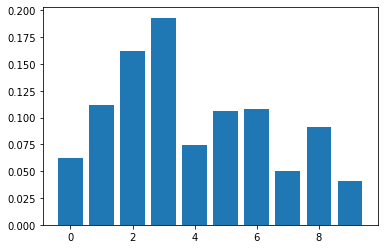

In [9]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = RandomForestClassifier()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

## XGBoost Feature Importance

XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm.

This algorithm can be used with scikit-learn via the XGBRegressor and XGBClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This algorithm is also provided via scikit-learn via the GradientBoostingClassifier and GradientBoostingRegressor classes and the same approach to feature selection can be used.

First, install the XGBoost library, such as with pip:

In [10]:
!sudo pip install xgboost

In [11]:
import xgboost
print(xgboost.__version__)

0.90


### XGBoost Regression Feature Importance

[17:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00060
Feature: 1, Score: 0.01917
Feature: 2, Score: 0.00091
Feature: 3, Score: 0.00118
Feature: 4, Score: 0.49380
Feature: 5, Score: 0.42342
Feature: 6, Score: 0.05057
Feature: 7, Score: 0.00419
Feature: 8, Score: 0.00124
Feature: 9, Score: 0.00491


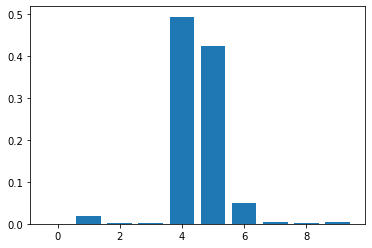

In [12]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = XGBRegressor()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### XGBoost Classification Feature Importance

Feature: 0, Score: 0.02464
Feature: 1, Score: 0.08153
Feature: 2, Score: 0.12516
Feature: 3, Score: 0.28400
Feature: 4, Score: 0.12694
Feature: 5, Score: 0.10752
Feature: 6, Score: 0.08624
Feature: 7, Score: 0.04820
Feature: 8, Score: 0.09357
Feature: 9, Score: 0.02220


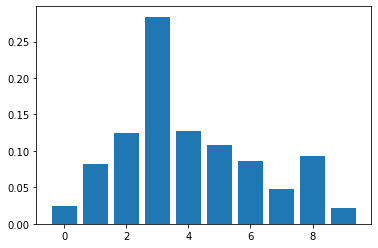

In [13]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = XGBClassifier()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps seven of the 10 features as being important to prediction.

# Permutation Feature Importance

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

Permutation feature selection can be used via the permutation_importance() function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

Let’s take a look at this approach to feature selection with an algorithm that does not support feature selection natively, specifically k-nearest neighbors.

## Permutation Feature Importance for Regression

Feature: 0, Score: 126.86944
Feature: 1, Score: 319.56612
Feature: 2, Score: 105.90767
Feature: 3, Score: 11.61638
Feature: 4, Score: 9413.97547
Feature: 5, Score: 8039.57753
Feature: 6, Score: 902.62713
Feature: 7, Score: 135.25995
Feature: 8, Score: 128.31181
Feature: 9, Score: 100.16440


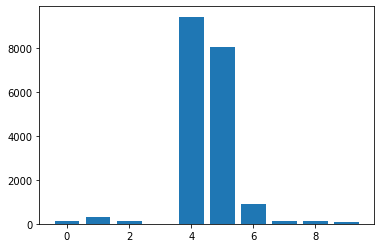

In [14]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

model = KNeighborsRegressor()

model.fit(X, y)

results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

importance = results.importances_mean

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

## Permutation Feature Importance for Classification

Feature: 0, Score: 0.05120
Feature: 1, Score: 0.05820
Feature: 2, Score: 0.05240
Feature: 3, Score: 0.09000
Feature: 4, Score: 0.05280
Feature: 5, Score: 0.05580
Feature: 6, Score: 0.07280
Feature: 7, Score: 0.05340
Feature: 8, Score: 0.05640
Feature: 9, Score: 0.02920


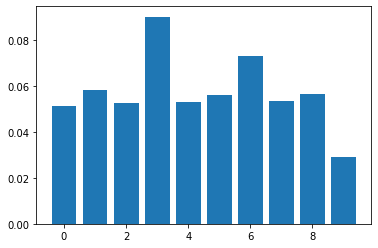

In [15]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = KNeighborsClassifier()

model.fit(X, y)

results = permutation_importance(model, X, y, scoring='accuracy')

importance = results.importances_mean

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

# Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

We can demonstrate this with a small example.

Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. We will use a logistic regression model as the predictive model.

This provides a baseline for comparison when we remove some features using feature importance scores.

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


Given that we created the dataset, we would expect better or the same results with half the number of input variables.

We could use any of the feature importance scores explored above, but in this case we will use the feature importance scores provided by random forest.

We can use the SelectFromModel class to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case.

In [18]:
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)

We can fit the feature selection method on the training dataset.

This will calculate the importance scores that can be used to rank all input features. We can then apply the method as a transform to select a subset of 5 most important features from the dataset. This transform will be applied to the training dataset and the test set.

In [19]:
fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)

X_test_fs = fs.transform(X_test)

Tying this all together, the complete example of using random forest feature importance for feature selection is listed below.

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def select_features(X_train, y_train, X_test):
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

yhat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In this case, we can see that the model achieves the same performance on the dataset, although with half the number of input features. As expected, the feature importance scores calculated by random forest allowed us to accurately rank the input features and delete those that were not relevant to the target variable.